In [14]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
%matplotlib inline

<br>mpg: Miles per gallon (fuel efficiency)<br>
cylinders: Number of cylinders in the engine<br>
displacement: Engine displacement (in cubic inches)<br>
horsepower: Engine horsepower<br>
weight: Vehicle weight (in pounds)<br>
acceleration: Time to accelerate from 0 to 60 mph (in seconds)<br>
model year: The year the car model was released<br>
origin: Country of origin (e.g., USA, Europe, Japan)<br>
name: Car name or model<br>
This dataset is commonly used for demonstrating regression analysis, data visualization, and other data science techniques.<br>

In [15]:
mpg_df = sns.load_dataset('mpg')
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [16]:
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [17]:
mpg_df[mpg_df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [18]:
mpg_df.dropna(inplace=True)
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


/home/matias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

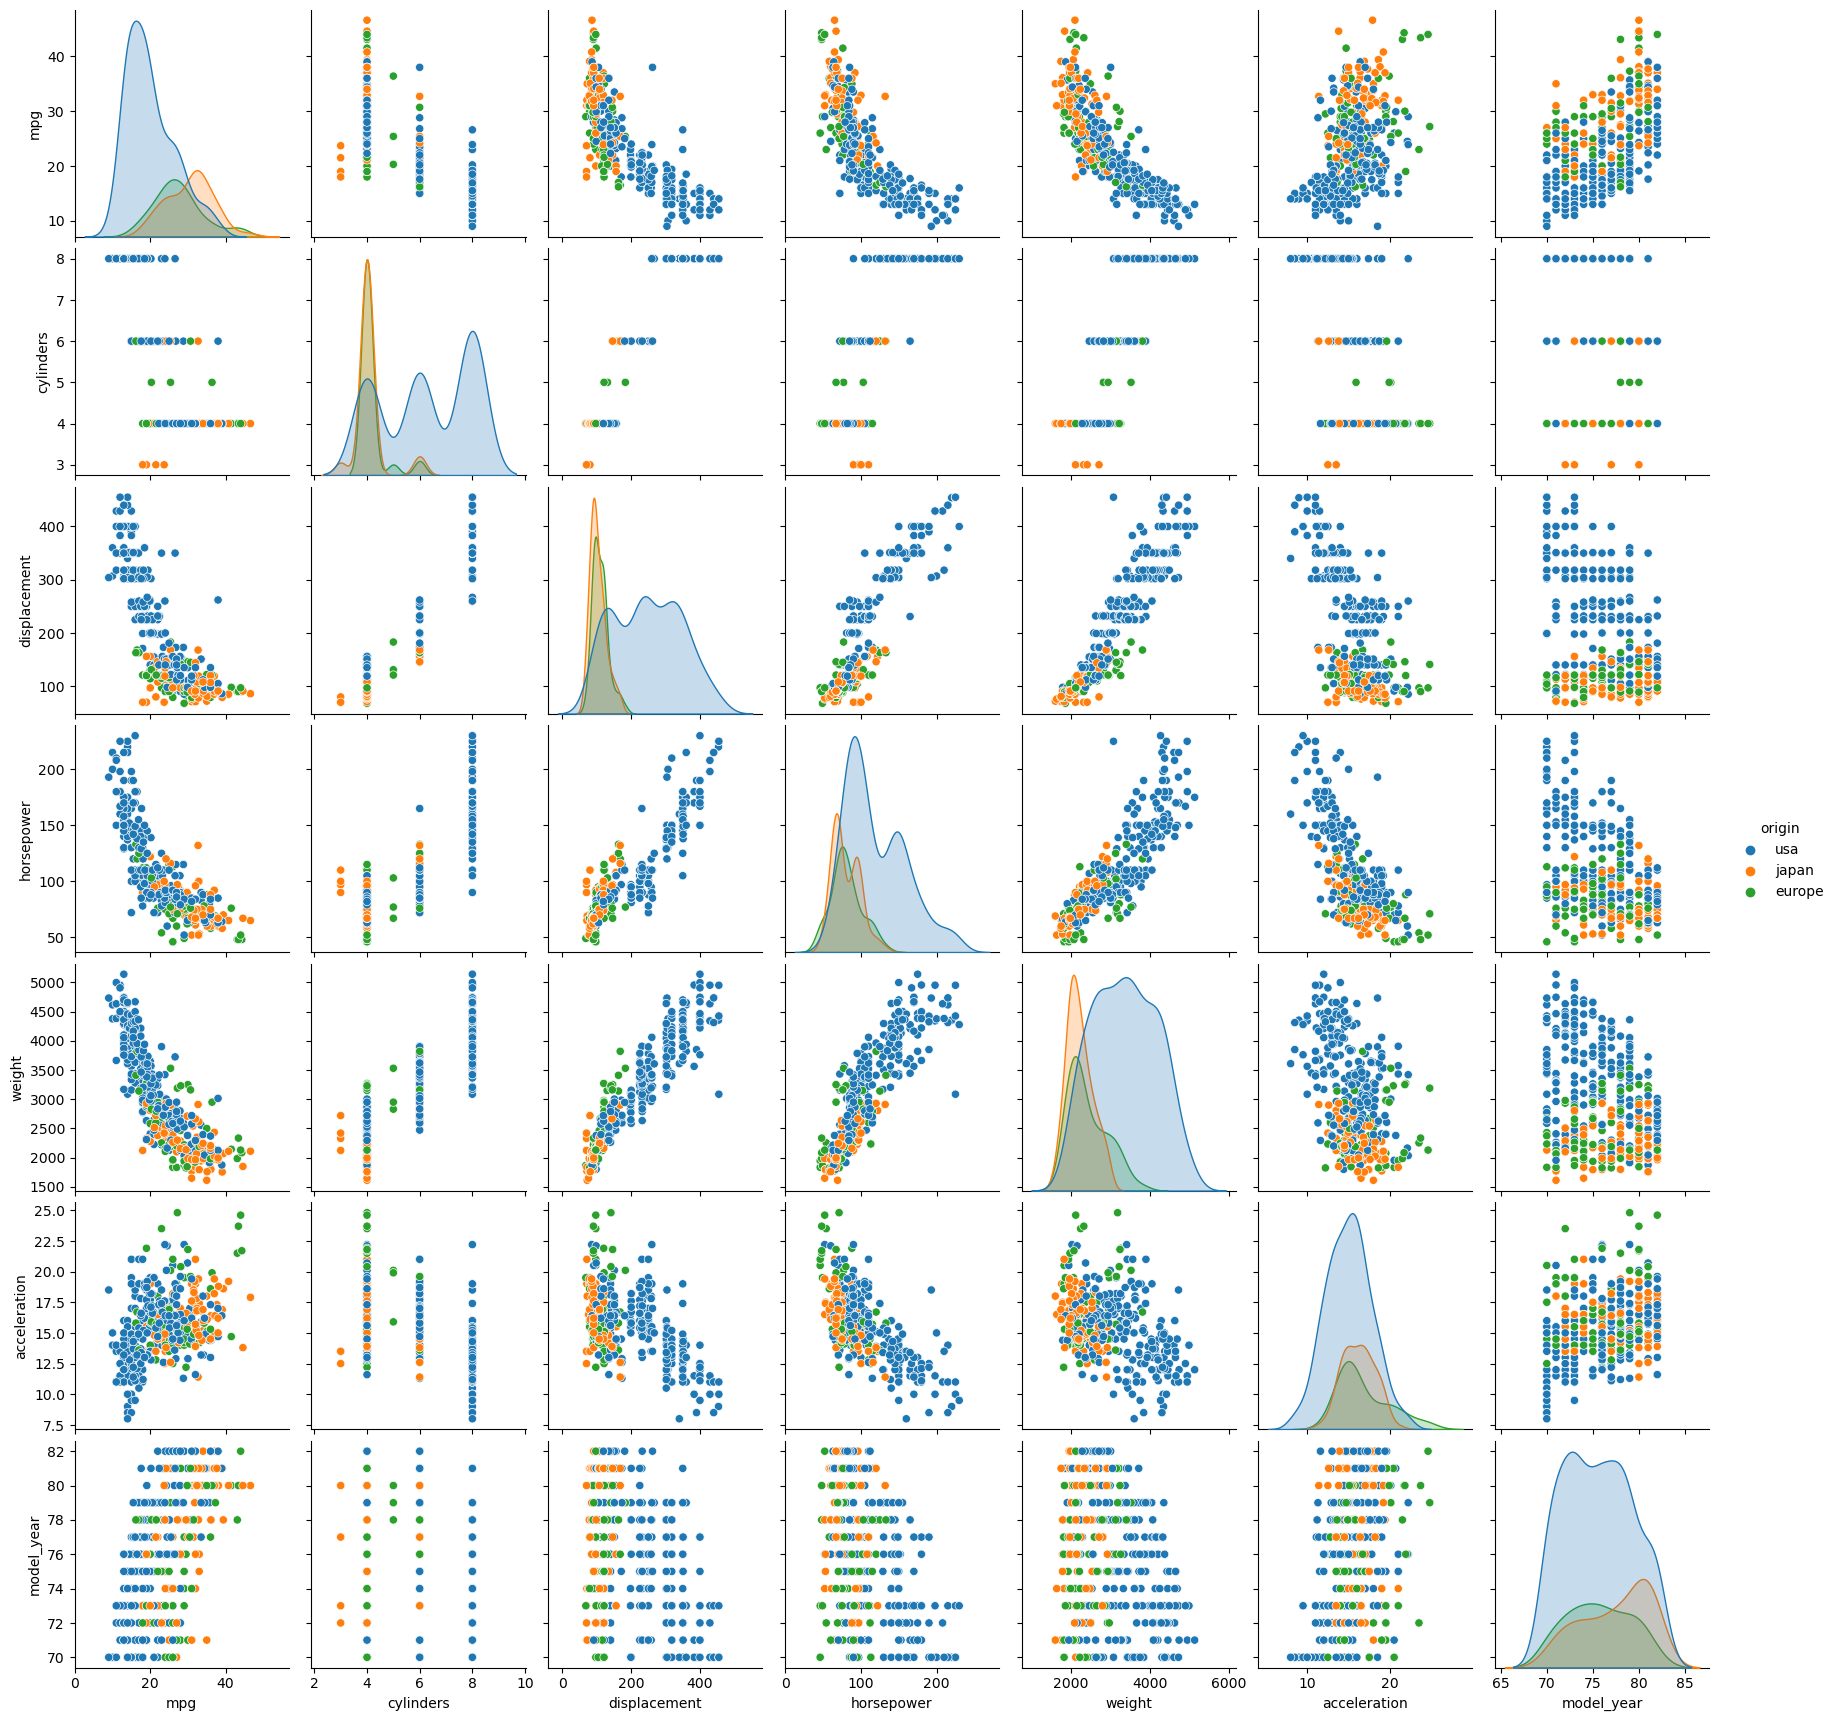

In [20]:
sns.pairplot(mpg_df,hue='origin')
plt.show()

In [21]:
df_mpg = mpg_df[['mpg','weight','horsepower','origin']] 
df_mpg.head()

,mpg,weight,horsepower,origin
0,18.0,3504,130.0,usa
1,15.0,3693,165.0,usa
2,18.0,3436,150.0,usa
3,16.0,3433,150.0,usa
4,17.0,3449,140.0,usa


In [23]:
df_mpg.describe()

,mpg,weight,horsepower
count,392.000000,392.000000,392.000000
mean,23.445918,2977.584184,104.469388
std,7.805007,849.402560,38.491160
min,9.000000,1613.000000,46.000000
25%,17.000000,2225.250000,75.000000
50%,22.750000,2803.500000,93.500000
75%,29.000000,3614.750000,126.000000
max,46.600000,5140.000000,230.000000


Text(0.5, 1.0, 'Mpg x HP')

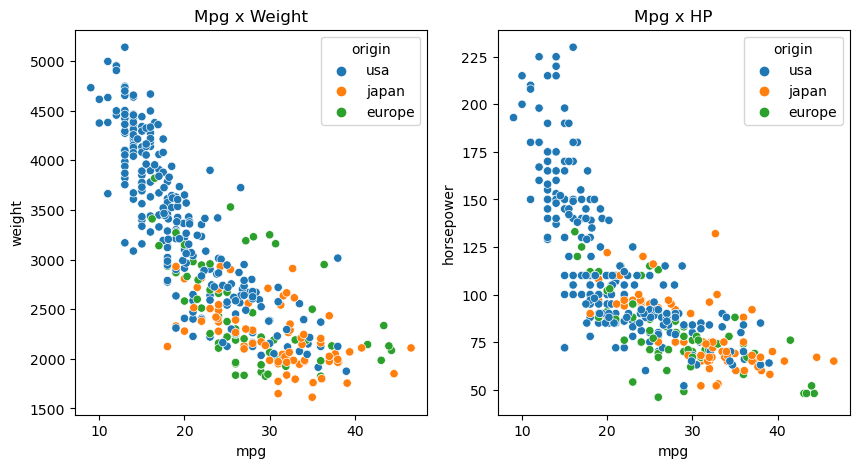

In [24]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(ax=axes[0],data=df_mpg,x='mpg',y='weight',hue='origin')
axes[0].set_title("Mpg x Weight")
sns.scatterplot(ax=axes[1],data=df_mpg,x='mpg',y='horsepower',hue='origin')
axes[1].set_title("Mpg x HP")

## Vemos que las escalas no son comparables por lo que procedemos a aplicar a Min-Max Scaling lo fijamos en un rango de [0,1] sin deformar el grafico, por lo tanto sigue siendo representativa.


In [25]:
features = df_mpg[['mpg','weight','horsepower']]
scaler = MinMaxScaler()
data_estandarizada = scaler.fit_transform(features)
df_estandarizado = pd.DataFrame(data_estandarizada,columns=features.columns)
df_mpg.loc[:,features.columns] = df_estandarizado
df_mpg.head()


,mpg,weight,horsepower,origin
0,0.239362,0.536150,0.456522,usa
1,0.159574,0.589736,0.646739,usa
2,0.239362,0.516870,0.565217,usa
3,0.186170,0.516019,0.565217,usa
4,0.212766,0.520556,0.510870,usa


# Volvemos a graficar

Text(0.5, 1.0, 'Mpg x HP')

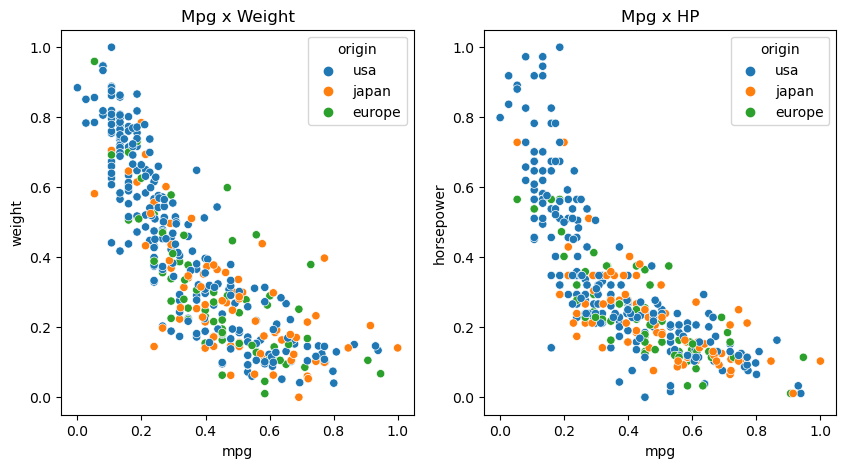

In [26]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(ax=axes[0],data=df_mpg,x='mpg',y='weight',hue='origin')
axes[0].set_title("Mpg x Weight")
sns.scatterplot(ax=axes[1],data=df_mpg,x='mpg',y='horsepower',hue='origin')
axes[1].set_title("Mpg x HP")

In [27]:
df_mpg.describe()

,mpg,weight,horsepower
count,386.000000,386.000000,386.000000
mean,0.383103,0.387613,0.318259
std,0.207595,0.242218,0.210482
min,0.000000,0.000000,0.000000
25%,0.212766,0.173164,0.157609
50%,0.357713,0.337539,0.258152
75%,0.531915,0.571165,0.445652
max,1.000000,1.000000,1.000000
